In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [139]:
# The data is acquired by scraping the website: 
# https://reboks.nus.edu.sg/nus_public_web/public/index.php/facilities/capacity
# every weekday from 8am to 6pm hourly; data is stored in an excel file labelled Gym_Data

df=pd.read_excel(r"C:\Users\acer\OneDrive\Desktop\Gym_Data.xlsx")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       1905 non-null   object
 1   Time       1905 non-null   object
 2   Venue      1905 non-null   object
 3   Occupancy  1905 non-null   object
dtypes: object(4)
memory usage: 59.7+ KB


,Date,Time,Venue,Occupancy
0,2023-03-06,15:00:04,Kent Ridge - Swimming Pool,4/250
1,2023-03-06,15:00:04,University Town - Recreational swimming pool,13/50
2,2023-03-06,15:00:04,Kent Ridge - Fitness gym @MPSH3,10/50
3,2023-03-06,15:00:04,University Sports Centre - Gym,12/40
4,2023-03-06,15:00:04,University Town - Fitness gym,41/100


In [140]:
df['Time']=df['Time'].apply(lambda x:x[:5]) 
# only the hours and min of the time is taken (seconds isn't necessary)
(df[df['Time'].apply(lambda x:int(x[3])>1)]) 
# looks at times where minutes is more than 10; as it is later than the 
# first 10 mintues of the hour at which the data should be collected & the number of people (Occupancy) 
# is likely not the same as when the data should have been collected 

,Date,Time,Venue,Occupancy
30,2023-03-19,09:30,Kent Ridge - Swimming Pool,35/250
31,2023-03-19,09:30,University Town - Recreational swimming pool,1/50
32,2023-03-19,09:30,Kent Ridge - Fitness gym @MPSH3,0/50
33,2023-03-19,09:30,University Sports Centre - Gym,5/40
34,2023-03-19,09:30,University Town - Fitness gym,15/100
95,2023-04-03,14:44,Kent Ridge - Swimming Pool,3/250
96,2023-04-03,14:44,University Town - Recreational swimming pool,0/50
97,2023-04-03,14:44,Kent Ridge - Fitness gym @MPSH3,14/50
98,2023-04-03,14:44,University Sports Centre - Gym,12/40
99,2023-04-03,14:44,University Town - Fitness gym,46/100


In [141]:
df=df.drop(df[df['Time'].apply(lambda x:int(x[3])>1)].index) 
# data that meets the condition above is dropped
df['Time']=df['Time'].str.replace(r':\d\d',':00') 
# cases where the minutes is less than/equal to 10 minutes past the hour
# is altered to be 00; to prevent formatting issues later

C:\Users\acer\AppData\Local\Temp\ipykernel_2300\3635471143.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Time']=df['Time'].str.replace(r':\d\d',':00')


In [142]:
df # resulting dataframe

,Date,Time,Venue,Occupancy
0,2023-03-06,15:00,Kent Ridge - Swimming Pool,4/250
1,2023-03-06,15:00,University Town - Recreational swimming pool,13/50
2,2023-03-06,15:00,Kent Ridge - Fitness gym @MPSH3,10/50
3,2023-03-06,15:00,University Sports Centre - Gym,12/40
4,2023-03-06,15:00,University Town - Fitness gym,41/100
...,...,...,...,...
1900,2023-05-22,18:00,Kent Ridge - Swimming Pool,33/250
1901,2023-05-22,18:00,University Town - Recreational swimming pool,13/50
1902,2023-05-22,18:00,Kent Ridge - Fitness gym @MPSH3,19/50
1903,2023-05-22,18:00,University Sports Centre - Gym,10/40


In [143]:
df['Date']=pd.to_datetime(df['Date']) # values in Date column, formerly strings; reassigned as datetime values

In [144]:
apr_df=df[df['Date']>='2023-04-06'].reset_index(drop=True)
# dates only on and after 06/04/2023 (dd/mm/yyyy) are looked at 
# (since that's when the collation of data was standardised by myself)

In [145]:
apr_df['Time']=pd.to_datetime(apr_df['Time']).dt.time

In [146]:
opening_times=pd.Series(['07:30:00','07:30:00','11:00:00','09:00:00','07:00:00'])
opening_times=pd.to_datetime(opening_times).dt.time 
all_times=pd.Series()
for _ in range(len(apr_df)//5):
    all_times=pd.concat([all_times,opening_times],ignore_index=True)
all_times

# series is created with repeated rows containing the opening times of each venue

C:\Users\acer\AppData\Local\Temp\ipykernel_2300\1606313664.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  all_times=pd.Series()


0       07:30:00
1       07:30:00
2       11:00:00
3       09:00:00
4       07:00:00
          ...   
1725    07:30:00
1726    07:30:00
1727    11:00:00
1728    09:00:00
1729    07:00:00
Length: 1730, dtype: object

In [147]:
apr_df['Opening']=all_times 
apr_df.head() # Kent Ridge swimming pool opens at 730 am, Kent Ridge fitness gym opens at 11 am

,Date,Time,Venue,Occupancy,Opening
0,2023-04-06,08:00:00,Kent Ridge - Swimming Pool,5/250,07:30:00
1,2023-04-06,08:00:00,University Town - Recreational swimming pool,0/100,07:30:00
2,2023-04-06,08:00:00,Kent Ridge - Fitness gym @MPSH3,0/50,11:00:00
3,2023-04-06,08:00:00,University Sports Centre - Gym,0/40,09:00:00
4,2023-04-06,08:00:00,University Town - Fitness gym,20/100,07:00:00


In [148]:
apr_open=apr_df[apr_df['Opening']<apr_df['Time']]
apr_open.head() 
# venues are filtered when value in Time column is more than/equal to the time in the Opening column
# Kent Ridge Fitness gym is disregarded at 8am since the gym is not open
# Thus occupancy being 0 is due to gym not being accessible

,Date,Time,Venue,Occupancy,Opening
0,2023-04-06,08:00:00,Kent Ridge - Swimming Pool,5/250,07:30:00
1,2023-04-06,08:00:00,University Town - Recreational swimming pool,0/100,07:30:00
4,2023-04-06,08:00:00,University Town - Fitness gym,20/100,07:00:00
5,2023-04-06,09:00:00,Kent Ridge - Swimming Pool,4/250,07:30:00
6,2023-04-06,09:00:00,University Town - Recreational swimming pool,2/100,07:30:00


In [149]:
apr_open['Vacant_spots']=(apr_open['Occupancy'].apply(lambda x:int(x.split('/')[-1]))-\
                          apr_open['Occupancy'].apply(lambda x:int(x.split('/')[0])))
apr_open_gym=apr_open[apr_open['Venue'].str.contains('Gym|gym')]
apr_open_gym.head() # only 'gym' venues are looked at; not swimming pools
# new column is also created looking at the number of vacant spots (total occupancy-current occupancy)

C:\Users\acer\AppData\Local\Temp\ipykernel_2300\1435040854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apr_open['Vacant_spots']=(apr_open['Occupancy'].apply(lambda x:int(x.split('/')[-1]))-\


,Date,Time,Venue,Occupancy,Opening,Vacant_spots
4,2023-04-06,08:00:00,University Town - Fitness gym,20/100,07:00:00,80
9,2023-04-06,09:00:00,University Town - Fitness gym,29/100,07:00:00,71
13,2023-04-06,10:00:00,University Sports Centre - Gym,7/40,09:00:00,33
14,2023-04-06,10:00:00,University Town - Fitness gym,32/100,07:00:00,68
18,2023-04-06,11:00:00,University Sports Centre - Gym,8/40,09:00:00,32


In [150]:
venues=sorted(apr_open_gym['Venue'].unique()) 

In [151]:
cmap_type='coolwarm'
pf=apr_open_gym[apr_open_gym['Venue']==venues[0]].pivot_table(values='Vacant_spots',columns='Date',index='Time') # 1st gym is looked at
for i,r in pf.iterrows():
    if any(r.isna()):
        pf[r[r.isna()].index]=pf[r[r.isna()].index].fillna(r.median())

Text(0.5, 1.0, 'Vacancies in Kent Ridge - Fitness gym @MPSH3')

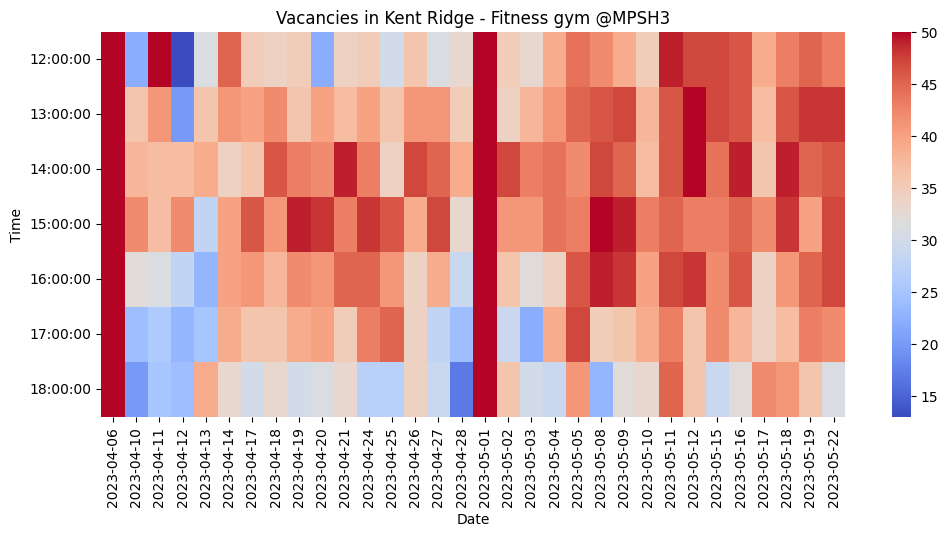

In [152]:
plt.figure(figsize=(12,5))
ax=sns.heatmap(pf,cmap=cmap_type)
tick_labels=[pf.columns[int(t)].strftime('%Y-%m-%d') for t in ax.get_xticks()]
tick_labels
ax.set_xticklabels(tick_labels)
plt.title(f'Vacancies in {venues[0]}')

In [153]:
refined_df_0=pd.DataFrame(columns=['Date','Time','Venue','Vacant Spots'])
for c in pf.columns:
    for i in pf.index:
        refined_df_0.loc[len(refined_df_0)]=([c,i,venues[0],pf[c].loc[i]])

In [154]:
pf=apr_open_gym[apr_open_gym['Venue']==venues[1]].pivot_table(values='Vacant_spots',columns='Date',index='Time')
for i,r in pf.iterrows():
    if any(r.isna()):
        pf[r[r.isna()].index]=pf[r[r.isna()].index].fillna(r.median())

<AxesSubplot: >

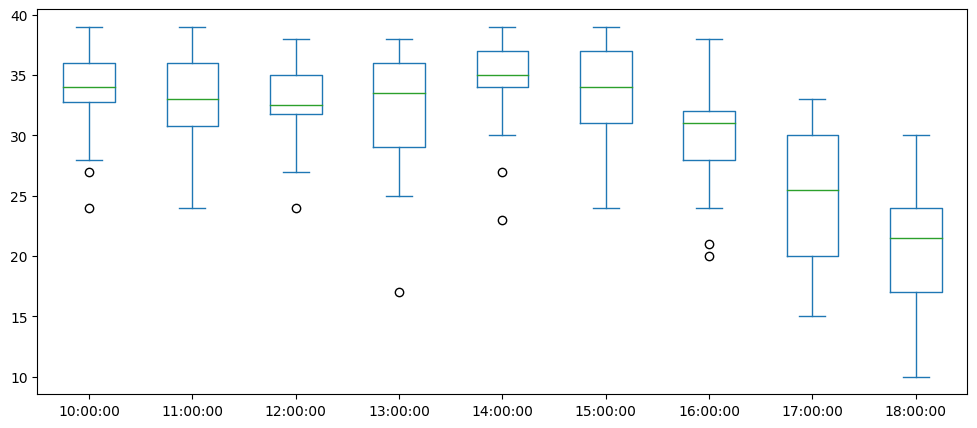

In [155]:
pf.transpose().plot(kind='box',figsize=(12,5))

Text(0.5, 1.0, 'Vacancies in University Sports Centre - Gym')

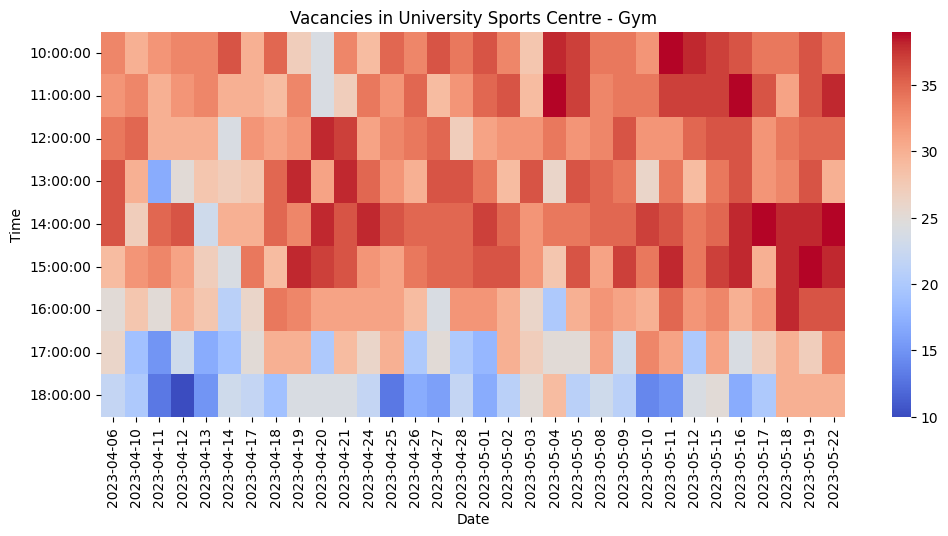

In [156]:
plt.figure(figsize=(12,5))
ax=sns.heatmap(pf,cmap=cmap_type)
tick_labels=[pf.columns[int(t)].strftime('%Y-%m-%d') for t in ax.get_xticks()]
tick_labels
ax.set_xticklabels(tick_labels)
plt.title(f'Vacancies in {venues[1]}')

<AxesSubplot: >

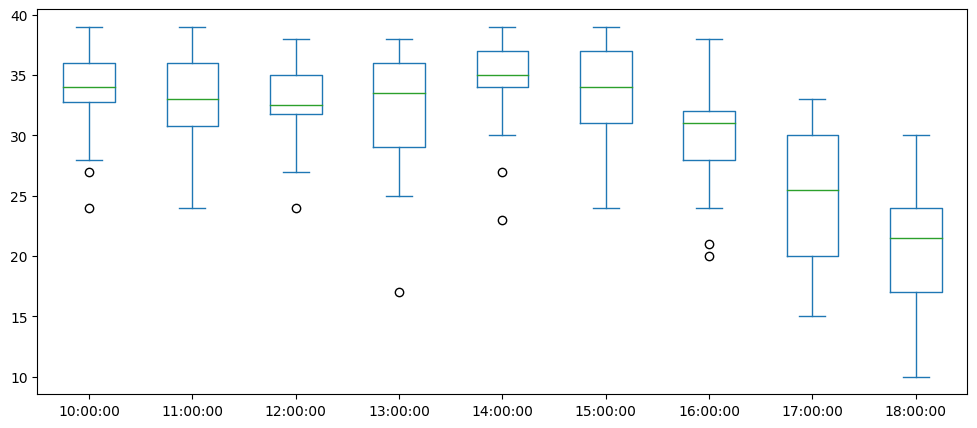

In [157]:
pf.transpose().plot(kind='box',figsize=(12,5))

In [158]:
refined_df_1=pd.DataFrame(columns=['Date','Time','Venue','Vacant Spots'])
for c in pf.columns:
    for i in pf.index:
        refined_df_1.loc[len(refined_df_1)]=([c,i,venues[1],pf[c].loc[i]])

Text(0.5, 1.0, 'Vacancies in University Town - Fitness gym')

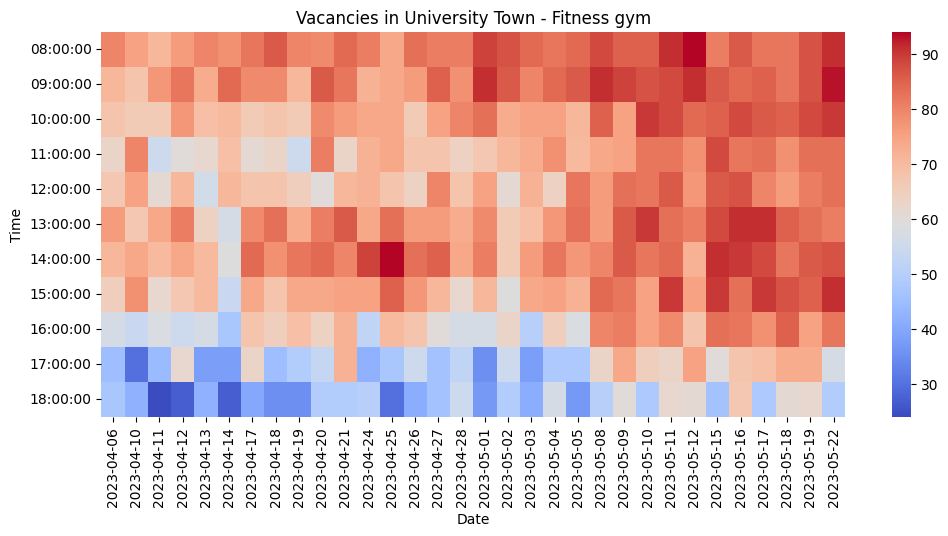

In [159]:
pf=apr_open_gym[apr_open_gym['Venue']==venues[2]].pivot_table(values='Vacant_spots',columns='Date',index='Time')
for i,r in pf.iterrows():
    if any(r.isna()):
        pf[r[r.isna()].index]=pf[r[r.isna()].index].fillna(r.median())
plt.figure(figsize=(12,5))
ax=sns.heatmap(pf,cmap=cmap_type)
tick_labels=[pf.columns[int(t)].strftime('%Y-%m-%d') for t in ax.get_xticks()]
tick_labels
ax.set_xticklabels(tick_labels)

plt.title(f'Vacancies in {venues[2]}')


Text(0.5, 1.0, 'Vacancy Levels')

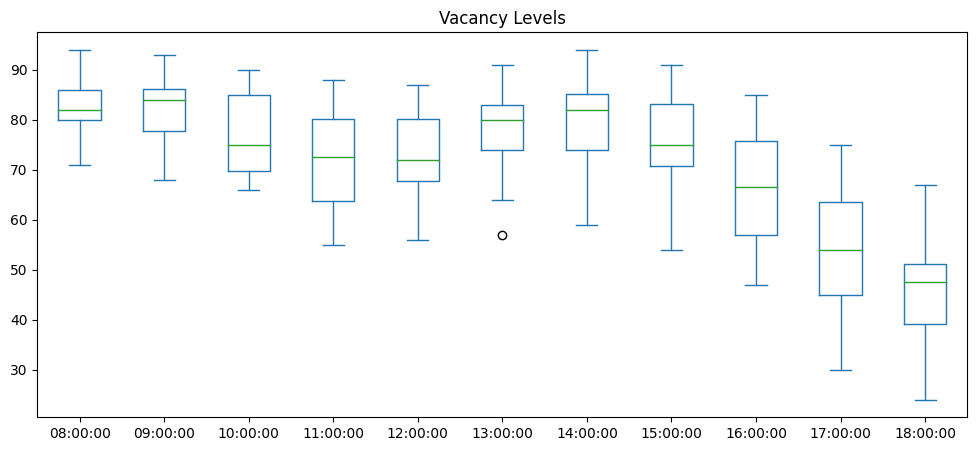

In [160]:
pf.transpose().plot(kind='box',figsize=(12,5))
plt.title('Vacancy Levels')

In [161]:
refined_df_2=pd.DataFrame(columns=['Date','Time','Venue','Vacant Spots'])
for c in pf.columns:
    for i in pf.index:
        refined_df_2.loc[len(refined_df_2)]=([c,i,venues[2],pf[c].loc[i]])

In [162]:
collated_refined_df=pd.concat([refined_df_0,refined_df_1,refined_df_2])
collated_refined_df

,Date,Time,Venue,Vacant Spots
0,2023-04-06,12:00:00,Kent Ridge - Fitness gym @MPSH3,50.0
1,2023-04-06,13:00:00,Kent Ridge - Fitness gym @MPSH3,50.0
2,2023-04-06,14:00:00,Kent Ridge - Fitness gym @MPSH3,50.0
3,2023-04-06,15:00:00,Kent Ridge - Fitness gym @MPSH3,50.0
4,2023-04-06,16:00:00,Kent Ridge - Fitness gym @MPSH3,50.0
...,...,...,...,...
347,2023-05-22,14:00:00,University Town - Fitness gym,87.0
348,2023-05-22,15:00:00,University Town - Fitness gym,91.0
349,2023-05-22,16:00:00,University Town - Fitness gym,82.0
350,2023-05-22,17:00:00,University Town - Fitness gym,57.0


In [ ]:
# based n the plots above, is clearly apparent that past 3pm, 
# a lot more ppl enter the gym and boi howdy the vacancies start dropping

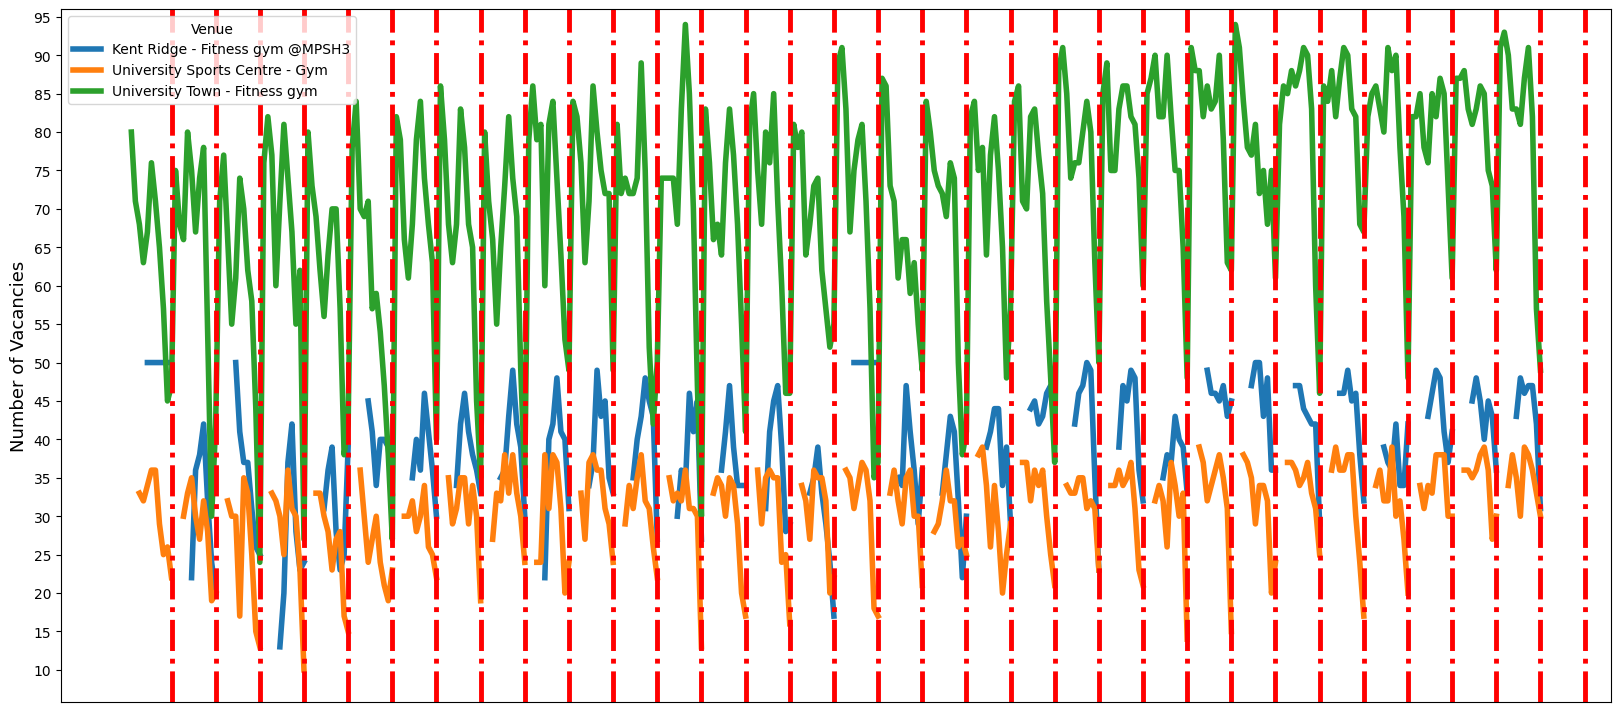

In [165]:
d_t=collated_refined_df

d_t.pivot_table(columns='Venue',values='Vacant Spots',index=['Date','Time']).plot(figsize=(20,9),kind='line',lw=4)
plt.xticks([],[])
plt.xlabel(None)
end_day=(list(range(10,int(plt.axis()[1])+1,11)))
for xc in (end_day):
    plt.axvline(xc,color='red',lw=3.5,linestyle='-.')
plt.ylabel('Number of Vacancies',fontdict={'size':13})
upper=96
plt.ylim(top=upper)
plt.yticks([i for i in range(10,upper,5)])
plt.show()

In [168]:
# over time, there is a slight increase in average number of vacancies 
# available for each gym venue; likely because hols approach and fewer ppl
# will stay in NUS


C:\Users\acer\AppData\Local\Temp\ipykernel_2300\2792621744.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u_town_apr['People_absent']=u_town_apr['Vacant Spots'].apply(lambda x:x)


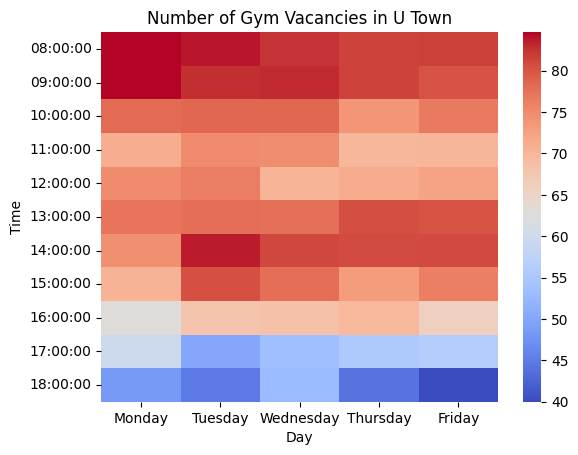

In [167]:
collated_refined_df['Day']=collated_refined_df['Date'].dt.day_name()
u_town=collated_refined_df[collated_refined_df['Venue']=='University Town - Fitness gym']
u_town_apr=u_town[u_town['Date']>'2023-04-06']
u_town_apr['People_absent']=u_town_apr['Vacant Spots'].apply(lambda x:x)
p_u_town=u_town_apr.pivot_table(columns='Day',index='Time',values='People_absent')
sns.heatmap(p_u_town,xticklabels=['Monday','Tuesday','Wednesday','Thursday','Friday'],cmap='coolwarm')
plt.title('Number of Gym Vacancies in U Town')
plt.show()
# in the U-Town gym, periods at which gym is most vacant does somewhat fluctuate; 
# being mainly 8-9am early in the week but changing to 1-2pm as the days progress to Fri